<a href="https://colab.research.google.com/github/ridopandiSinaga/Submission-klasifikasi-gambar-newbie-ML/blob/main/submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Submission Proyek Akhir Klasifikasi Gambar oleh:        Ridopandi Sinaga


* **import tensorflow as tf**:
mengimpor modul TensorFlow yang diperlukan untuk pengembangan model deep learning

* **from tensorflow.keras.optimizers import RMSprop**: mengimpor optimiser RMSprop untuk model keras yang digunakan untuk memperbarui bobot saat model dilatih

* **from tensorflow.keras.preprocessing.image import ImageDataGenerator**: mengimpor modul ImageDataGenerator untuk melakukan augmentasi data gambar dan memuat gambar secara otomatis dari direktori yang ditentukan.




In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator



*  **import zipfile, os** adalah untuk mengimport dua modul yaitu zipfile dan os.

*  **local_zip = '/content/sample_data/rockpaperscissors.zip**' adalah untuk menyimpan alamat file .zip dari dataset rockpaperscissors pada variabel local_zip.
*  **zip_ref = zipfile.ZipFile(local_zip, 'r')** adalah untuk membuka file .zip pada local_zip dan menyimpannya pada variabel zip_ref.

*   **zip_ref.extractall('/content/sample_data')** adalah untuk mengekstrak isi dari file .zip ke dalam direktori /content/sample_data.
*   **zip_ref.close()** adalah untuk menutup file .zip yang sudah diekstrak.
*   **base_dir = '/content/sample_data/rockpaperscissors/rps-cv-images'** adalah untuk menyimpan direktori gambar rockpaperscissors yang akan digunakan untuk pelatihan model.


In [ ]:

import zipfile, os
from google.colab import drive
from google.colab import files

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/MachineLearning


local_zip ='/content/gdrive/MyDrive/MachineLearning/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/gdrive/MyDrive/MachineLearning/')
zip_ref.close()

base_dir = '/content/gdrive/MyDrive/MachineLearning/rockpaperscissors/rps-cv-images'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/MachineLearning


menampilkan daftar file dan folder yang berada pada direktori base_dir. 

In [ ]:

os.listdir(base_dir)

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

melakukan augmentasi data pada gambar dalam dataset yang akan digunakan untuk training model.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,                       #nilai pixel pada citra menjadi nilai dalam rentang 0 hingga 1.
    shear_range = 0.2,                      #kolom citra  digeser sebesar 20% dari dimensinya.
    rotation_range = 20,                    #citra  diputar sebesar 20 derajat dalam arah searah atau berlawanan arah jarum jam.
    fill_mode = 'wrap',                     #membalikkan piksel di tepi citra menjadi bagian dalam citra untuk masalah piksel kosong pada batas citra
    horizontal_flip = True,                 #citra akan diputar secara horizontal dengan kemungkinan 50%.
    validation_split = 0.4                  #40% data validasi, 60% data train
)

In [ ]:
# menghasilkan batch gambar training, 
training_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    shuffle = True,
    subset = 'training'
)
# menghasilkan batch gambar validation.
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# model neural network untuk mengklasifikasikan gambar tangan yang membentuk gunting, batu, atau kertas. 
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [ ]:
# mengompilasi model dengan menentukan loss function, optimizer, dan metrics yang akan digunakan saat proses pelatihan model.
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
#melatih model menggunakan data generator yang telah dibuat sebelumnya. 
model.fit(
    training_generator,
    steps_per_epoch = 16,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 4,
    verbose = 2
)
  

Epoch 1/15
16/16 - 24s - loss: 1.2490 - accuracy: 0.3828 - val_loss: 1.0634 - val_accuracy: 0.3750 - 24s/epoch - 2s/step
Epoch 2/15
16/16 - 16s - loss: 1.0202 - accuracy: 0.4785 - val_loss: 0.8858 - val_accuracy: 0.5703 - 16s/epoch - 972ms/step
Epoch 3/15
16/16 - 15s - loss: 0.7727 - accuracy: 0.6909 - val_loss: 0.6438 - val_accuracy: 0.7969 - 15s/epoch - 942ms/step
Epoch 4/15
16/16 - 16s - loss: 0.6126 - accuracy: 0.7697 - val_loss: 0.4764 - val_accuracy: 0.8516 - 16s/epoch - 1s/step
Epoch 5/15
16/16 - 15s - loss: 0.4128 - accuracy: 0.8594 - val_loss: 0.3682 - val_accuracy: 0.8750 - 15s/epoch - 965ms/step
Epoch 6/15
16/16 - 15s - loss: 0.3273 - accuracy: 0.8887 - val_loss: 0.4972 - val_accuracy: 0.7578 - 15s/epoch - 917ms/step
Epoch 7/15
16/16 - 15s - loss: 0.3007 - accuracy: 0.8797 - val_loss: 0.1927 - val_accuracy: 0.9219 - 15s/epoch - 927ms/step
Epoch 8/15
16/16 - 15s - loss: 0.2901 - accuracy: 0.8984 - val_loss: 0.1764 - val_accuracy: 0.9219 - 15s/epoch - 922ms/step
Epoch 9/15
16/

In [ ]:
import numpy as np                                #mengimport library NumPy untuk mengolah array dan matriks numerik dalam Python.
from google.colab import files                    #mengimport files dari Google Colab untuk dapat mengupload file dari komputer ke Google Colab.
from tensorflow.keras.preprocessing import image  #mengimport modul image dari library Keras untuk melakukan preprocessing terhadap gambar sebelum melakukan prediksi.
import matplotlib.pyplot as plt                   #mengimport library Matplotlib untuk menampilkan visualisasi grafik atau gambar.
import matplotlib.image as mpimg                  #mengimport modul image dari library Matplotlib untuk memproses dan menampilkan gambar.

%matplotlib inline                                
     

implementasi dari model CNN (Convolutional Neural Network)

Saving 1fKclJk4eBWOQSR1.png to 1fKclJk4eBWOQSR1.png
1/1 [==============================] - 0s 29ms/step
1fKclJk4eBWOQSR1.png
Gambar Kertas


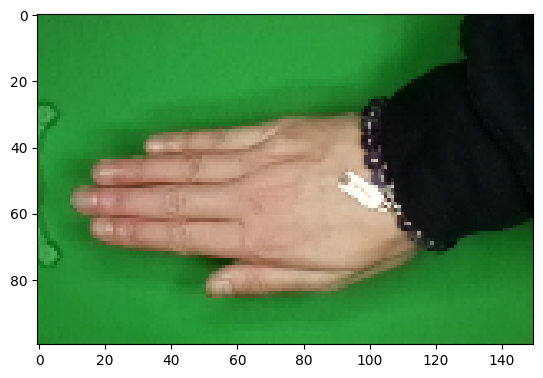

In [ ]:
# untuk mengupload gambar dari perangkat lokal dan kemudian mengembalikannya sebagai dictionary.
uploaded = files.upload()

for gambar in uploaded.keys():                                # mengulang setiap gambar yang diupload.
  path = gambar                                               # menunjukkan lokasi gambar yang akan diproses.
  img = image.load_img(path, target_size = (100, 150))        # memuat gambar sebagai objek dan menentukan ukuran gambar yang akan diproses.
  imgplot = plt.imshow(img)                                   # menampilkan gambar menggunakan matplotlib.
  x = image.img_to_array(img)                                 # mengubah gambar menjadi array.
  x = np.expand_dims(x, axis = 0)                             # menambahkan dimensi baru pada array.

  images = np.vstack([x])                                     # menumpuk beberapa array menjadi satu.
  clasification = model.predict(images, batch_size = 10)      # mengklasifikasikan gambar menggunakan model CNN.

  print(gambar)                                               #menampilkan gambar
  if clasification[0][0] == 1:                                #menentukan kategori gambar 
    print("Gambar Kertas")
  elif clasification[0][1] == 1:
    print("Gambar Batu")
  elif clasification[0][2] == 1:
    print("Gambar gunting")
  else:
    print("Gambar tidak dikenali")

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print('Accuracy:', accuracy)



28/28 [==============================] - 14s 514ms/step - loss: 0.1750 - accuracy: 0.9497
Accuracy: 0.9496567249298096
